In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

In [2]:
df = pd.read_csv("C:/Users/Anchal/Desktop/IBM - Machine Learning/Assignments/Projects/Dataset/survey_results_public.csv")

In [3]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [4]:
df.shape

(73268, 79)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [6]:
df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000,3.842200e+04,0.0,0.0,36769.000000,3.807100e+04
mean,36634.500000,2.342434e+52,NaN,NaN,10.242378,1.707613e+05
std,21150.794099,4.591478e+54,NaN,NaN,8.706850,7.814132e+05
min,1.000000,0.000000e+00,NaN,NaN,0.000000,1.000000e+00
25%,18317.750000,3.000000e+04,NaN,NaN,4.000000,3.583200e+04
50%,36634.500000,7.750000e+04,NaN,NaN,8.000000,6.784500e+04
75%,54951.250000,1.540000e+05,NaN,NaN,15.000000,1.200000e+05
max,73268.000000,9.000000e+56,NaN,NaN,50.000000,5.000000e+07


In [7]:
duplicate = df[df.duplicated('ResponseId')]
duplicate

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly


In [8]:
df.set_index(['ResponseId'],inplace = True)

In [9]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
salary_df = df[['Employment', 'EdLevel', 'YearsCodePro', 'DevType',
       'OrgSize', 'Country', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith',
       'OpSysProfessional use', 'Age', 'Gender', 'WorkExp', 'Salary']]
salary_df.head()

,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary
ResponseId,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Employed, full-time",NaN,NaN,NaN,NaN,Canada,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,macOS,NaN,NaN,NaN,NaN
3,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,Pandas,NaN,Notepad++;Visual Studio,Windows,25-34 years old,Man,NaN,40205.0
4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",100 to 499 employees,Israel,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,.NET,NaN,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,Man,NaN,215232.0
5,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,.NET,npm,Notepad++;Visual Studio;Visual Studio Code;Xcode,Windows,25-34 years old,NaN,NaN,NaN


In [10]:
salary_df = salary_df[salary_df["Salary"].notnull()]
salary_df.head()

,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary
ResponseId,,,,,,,,,,,,,,,,,,
3,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,Pandas,NaN,Notepad++;Visual Studio,Windows,25-34 years old,Man,NaN,40205.0
4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",100 to 499 employees,Israel,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,.NET,NaN,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,Man,NaN,215232.0
9,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",I don’t know,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Windows,25-34 years old,Woman,6.0,49056.0
11,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,Microsoft SQL Server,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,.NET,Docker;npm;Terraform,Rider;Visual Studio;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),18-24 years old,Man,NaN,60307.0
12,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,20 to 99 employees,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Linux-based;macOS;Windows,35-44 years old,Man,14.0,194400.0


In [11]:
salary_df.shape

(38071, 18)

In [12]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 3 to 73122
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employment                    38067 non-null  object 
 1   EdLevel                       38054 non-null  object 
 2   YearsCodePro                  37935 non-null  object 
 3   DevType                       37989 non-null  object 
 4   OrgSize                       38042 non-null  object 
 5   Country                       38071 non-null  object 
 6   LanguageHaveWorkedWith        37960 non-null  object 
 7   DatabaseHaveWorkedWith        33325 non-null  object 
 8   PlatformHaveWorkedWith        28873 non-null  object 
 9   WebframeHaveWorkedWith        29552 non-null  object 
 10  MiscTechHaveWorkedWith        24234 non-null  object 
 11  ToolsTechHaveWorkedWith       30553 non-null  object 
 12  NEWCollabToolsHaveWorkedWith  37780 non-null  object 
 13  O

In [13]:
salary_df.describe()

,WorkExp,Salary
count,27103.000000,3.807100e+04
mean,10.436557,1.707613e+05
std,8.532661,7.814132e+05
min,0.000000,1.000000e+00
25%,4.000000,3.583200e+04
50%,8.000000,6.784500e+04
75%,15.000000,1.200000e+05
max,50.000000,5.000000e+07


In [14]:
salary_df.Employment.unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       nan,
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [15]:
salary_df.columns

Index(['Employment', 'EdLevel', 'YearsCodePro', 'DevType', 'OrgSize',
       'Country', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'OpSysProfessional use', 'Age',
       'Gender', 'WorkExp', 'Salary'],
      dtype='object')

In [16]:
salary_df.head()

,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary
ResponseId,,,,,,,,,,,,,,,,,,
3,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Data scientist or machine learning specialist;...,20 to 99 employees,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,Microsoft SQL Server,NaN,Angular.js,Pandas,NaN,Notepad++;Visual Studio,Windows,25-34 years old,Man,NaN,40205.0
4,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",100 to 499 employees,Israel,C#;JavaScript;SQL;TypeScript,Microsoft SQL Server,NaN,ASP.NET;ASP.NET Core,.NET,NaN,Notepad++;Visual Studio;Visual Studio Code,Windows,35-44 years old,Man,NaN,215232.0
9,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",I don’t know,Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Windows,25-34 years old,Woman,6.0,49056.0
11,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Developer, full-stack;Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,Bash/Shell;C#;HTML/CSS;JavaScript;PowerShell;SQL,Microsoft SQL Server,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Vue.js,.NET,Docker;npm;Terraform,Rider;Visual Studio;Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),18-24 years old,Man,NaN,60307.0
12,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Engineering manager,20 to 99 employees,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Linux-based;macOS;Windows,35-44 years old,Man,14.0,194400.0


In [17]:
salary_df.isnull().sum()

Employment                          4
EdLevel                            17
YearsCodePro                      136
DevType                            82
OrgSize                            29
Country                             0
LanguageHaveWorkedWith            111
DatabaseHaveWorkedWith           4746
PlatformHaveWorkedWith           9198
WebframeHaveWorkedWith           8519
MiscTechHaveWorkedWith          13837
ToolsTechHaveWorkedWith          7518
NEWCollabToolsHaveWorkedWith      291
OpSysProfessional use            1200
Age                                87
Gender                            133
WorkExp                         10968
Salary                              0
dtype: int64

<AxesSubplot:>

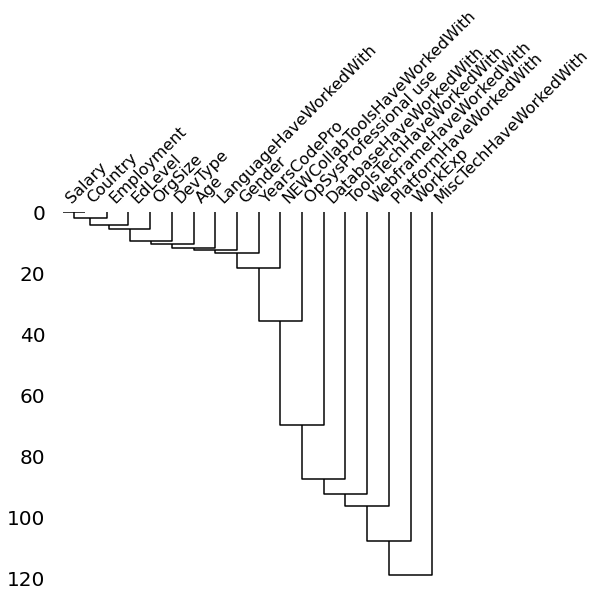

In [18]:
msno.dendrogram(salary_df,figsize=(7,7))

<AxesSubplot:>

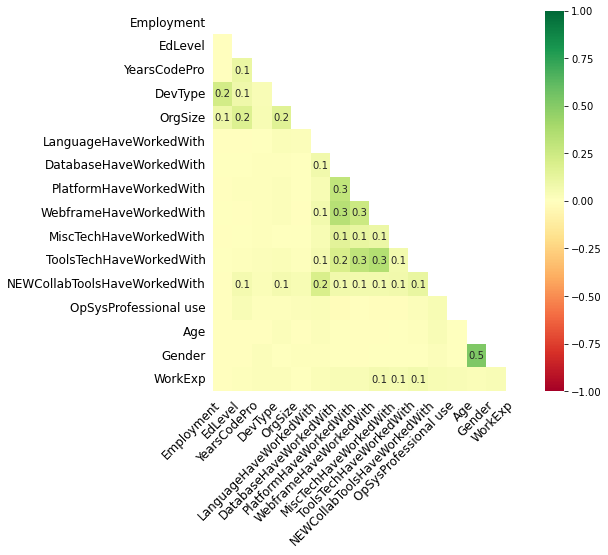

In [19]:
msno.heatmap(salary_df,cmap="RdYlGn", figsize=(7,7), fontsize=12)

In [20]:
salary_df = salary_df.dropna()

In [21]:
salary_df.shape

(10384, 18)

In [22]:
salary_df.EdLevel.unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Something else',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)'], dtype=object)

In [23]:
salary_df['EdLevel'] = salary_df['EdLevel'].replace(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'],['Masters','Bachelors','Undergraduate','Undergraduate','Undergraduate','Undergraduate','Postgraduate','Postgraduate','Undergraduate'])

In [24]:
salary_df.EdLevel.unique()

array(['Bachelors', 'Masters', 'Undergraduate', 'Postgraduate'],
      dtype=object)

In [25]:
salary_df.EdLevel.value_counts()

Bachelors        5145
Masters          2604
Undergraduate    2236
Postgraduate      399
Name: EdLevel, dtype: int64

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

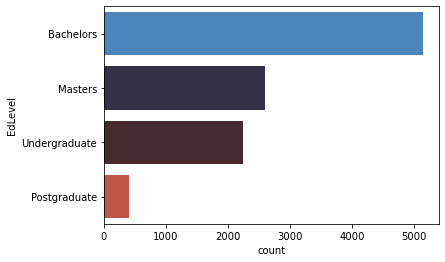

In [26]:
sns.countplot(y = salary_df.EdLevel,palette = "icefire")

<AxesSubplot:xlabel='Salary', ylabel='EdLevel'>

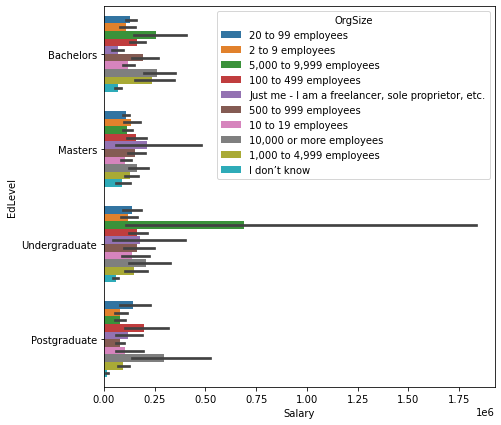

In [27]:
plt.figure(figsize =(7,7))
sns.barplot( y = 'EdLevel', x ="Salary", hue ="OrgSize",data = salary_df)

In [28]:
salary_df.YearsCodePro.unique()

array(['10', '5', '4', '20', '9', '22', '3', '7', '8', '15', '19', '12',
       '2', '1', 'Less than 1 year', '14', '11', '6', '25', '16', '31',
       '17', '13', '27', '26', '23', '21', '18', '30', '32', '24', '34',
       '35', '41', '40', '29', '28', '33', '42', '38', '45', '37', '36',
       '39', '43', '44', 'More than 50 years', '46'], dtype=object)

In [29]:
salary_df.YearsCodePro.isnull().sum()

0

In [30]:
salary_df['YearsCodePro'] = salary_df['YearsCodePro'].replace(['Less than 1 year','More than 50 years'],[0.5,51])

In [31]:
salary_df.YearsCodePro.unique()

array(['10', '5', '4', '20', '9', '22', '3', '7', '8', '15', '19', '12',
       '2', '1', 0.5, '14', '11', '6', '25', '16', '31', '17', '13', '27',
       '26', '23', '21', '18', '30', '32', '24', '34', '35', '41', '40',
       '29', '28', '33', '42', '38', '45', '37', '36', '39', '43', '44',
       51, '46'], dtype=object)

In [32]:
salary_df.YearsCodePro = salary_df.YearsCodePro.astype('float64')


In [33]:
salary_df.YearsCodePro.value_counts()

3.0     947
5.0     898
4.0     831
2.0     754
6.0     716
10.0    713
8.0     630
7.0     608
1.0     455
12.0    378
15.0    353
11.0    332
9.0     332
0.5     261
20.0    246
14.0    216
13.0    206
16.0    197
22.0    176
18.0    162
17.0    152
25.0    137
23.0     90
24.0     85
21.0     81
19.0     57
30.0     56
26.0     54
27.0     42
28.0     39
32.0     26
35.0     23
29.0     21
31.0     15
38.0     15
36.0     15
40.0     14
34.0     10
33.0     10
37.0     10
39.0      7
41.0      4
43.0      3
44.0      2
42.0      2
45.0      1
51.0      1
46.0      1
Name: YearsCodePro, dtype: int64

In [34]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10384 entries, 12 to 73120
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employment                    10384 non-null  object 
 1   EdLevel                       10384 non-null  object 
 2   YearsCodePro                  10384 non-null  float64
 3   DevType                       10384 non-null  object 
 4   OrgSize                       10384 non-null  object 
 5   Country                       10384 non-null  object 
 6   LanguageHaveWorkedWith        10384 non-null  object 
 7   DatabaseHaveWorkedWith        10384 non-null  object 
 8   PlatformHaveWorkedWith        10384 non-null  object 
 9   WebframeHaveWorkedWith        10384 non-null  object 
 10  MiscTechHaveWorkedWith        10384 non-null  object 
 11  ToolsTechHaveWorkedWith       10384 non-null  object 
 12  NEWCollabToolsHaveWorkedWith  10384 non-null  object 
 13  

In [35]:
salary_df["OrgSize"].unique()

array(['20 to 99 employees', '2 to 9 employees',
       '5,000 to 9,999 employees', '100 to 499 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '500 to 999 employees', '10 to 19 employees',
       '10,000 or more employees', '1,000 to 4,999 employees',
       'I don’t know'], dtype=object)

In [36]:
salary_df["OrgSize"] = salary_df["OrgSize"].replace(['20 to 99 employees', '100 to 499 employees', 'I don’t know',
       '2 to 9 employees', '1,000 to 4,999 employees',
       '10,000 or more employees', '500 to 999 employees',
       '10 to 19 employees', '5,000 to 9,999 employees',
       'Just me - I am a freelancer, sole proprietor, etc.'],
                                                    ['Micro enterprise','Small enterprise','Medium enterprise','Micro enterprise',
                                                     'Medium enterprise','Large enterprise','Medium enterprise','Micro enterprise',
                                                    'Large enterprise','Freelancer'])

In [37]:
salary_df["OrgSize"].value_counts(sort = True)

Micro enterprise     4255
Medium enterprise    2182
Small enterprise     2065
Large enterprise     1837
Freelancer             45
Name: OrgSize, dtype: int64

<AxesSubplot:xlabel='count', ylabel='OrgSize'>

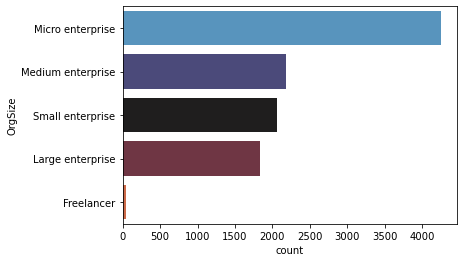

In [38]:
sns.countplot(y = salary_df.OrgSize,order = salary_df['OrgSize'].value_counts().index,palette = "icefire")

In [39]:
salary_df.Country.unique()

array(['United States of America', 'Italy', 'Canada', 'Germany',
       'Ireland', 'Poland', 'Norway', 'Netherlands', 'Uruguay', 'Spain',
       'France', 'United Kingdom of Great Britain and Northern Ireland',
       'Sweden', 'India', 'Greece', 'Latvia', 'Thailand', 'China',
       'Brazil', 'Israel', 'Czech Republic', 'Viet Nam', 'Portugal',
       'Tunisia', 'Australia', 'Denmark', 'Switzerland', 'Finland',
       'Ukraine', 'Mexico', 'Austria', 'Hungary', 'Belgium', 'Croatia',
       'Bosnia and Herzegovina', 'Lithuania', 'Turkey', 'Costa Rica',
       'Estonia', 'Morocco', 'Slovakia', 'South Africa', 'Serbia',
       'Ecuador', 'Russian Federation', 'Iran, Islamic Republic of...',
       'Andorra', 'Bangladesh', 'Indonesia', 'Pakistan', 'Lebanon',
       'Japan', 'Argentina', 'Hong Kong (S.A.R.)', 'Egypt', 'New Zealand',
       'Chile', 'Jordan', 'Azerbaijan', 'Sri Lanka', 'Singapore',
       'South Korea', 'Romania', 'Taiwan', 'Saudi Arabia', 'Malaysia',
       'Slovenia', 'Bulg

In [40]:
len(salary_df['Country'])

10384

In [41]:
country_count = salary_df.Country.value_counts(())
country_count

United States of America                                2325
India                                                    712
Germany                                                  684
United Kingdom of Great Britain and Northern Ireland     682
Brazil                                                   465
                                                        ... 
Iraq                                                       1
Libyan Arab Jamahiriya                                     1
Timor-Leste                                                1
Tajikistan                                                 1
Bhutan                                                     1
Name: Country, Length: 150, dtype: int64

In [42]:
def clean_data(x):
    list = salary_df[x].str.split(";",expand = True)
    list.stack()
    count = list.stack().value_counts(sort = True)
    print(count)
    df = pd.DataFrame(count).reset_index()
    df.columns = [x,'count']
    plt.figure(figsize =(15,15))
    
    sns.barplot(y = x, x = 'count', data = df,palette = "icefire")
    plt.xticks(rotation = 45)
    return plt.show()

JavaScript     8388
SQL            6854
HTML/CSS       6764
TypeScript     5952
Python         5202
C#             4372
Java           3922
Bash/Shell     3798
PHP            2295
PowerShell     2067
C++            1767
Go             1698
C              1397
Kotlin         1182
Dart            953
Rust            929
Ruby            842
Groovy          592
Swift           584
VBA             521
R               448
Scala           430
Lua             385
Assembly        373
MATLAB          343
Objective-C     340
Elixir          304
Perl            248
Delphi          204
F#              201
Solidity        192
Haskell         180
Clojure         166
Erlang          126
LISP            105
Julia            89
COBOL            71
SAS              69
Fortran          61
Crystal          48
OCaml            36
APL              34
dtype: int64


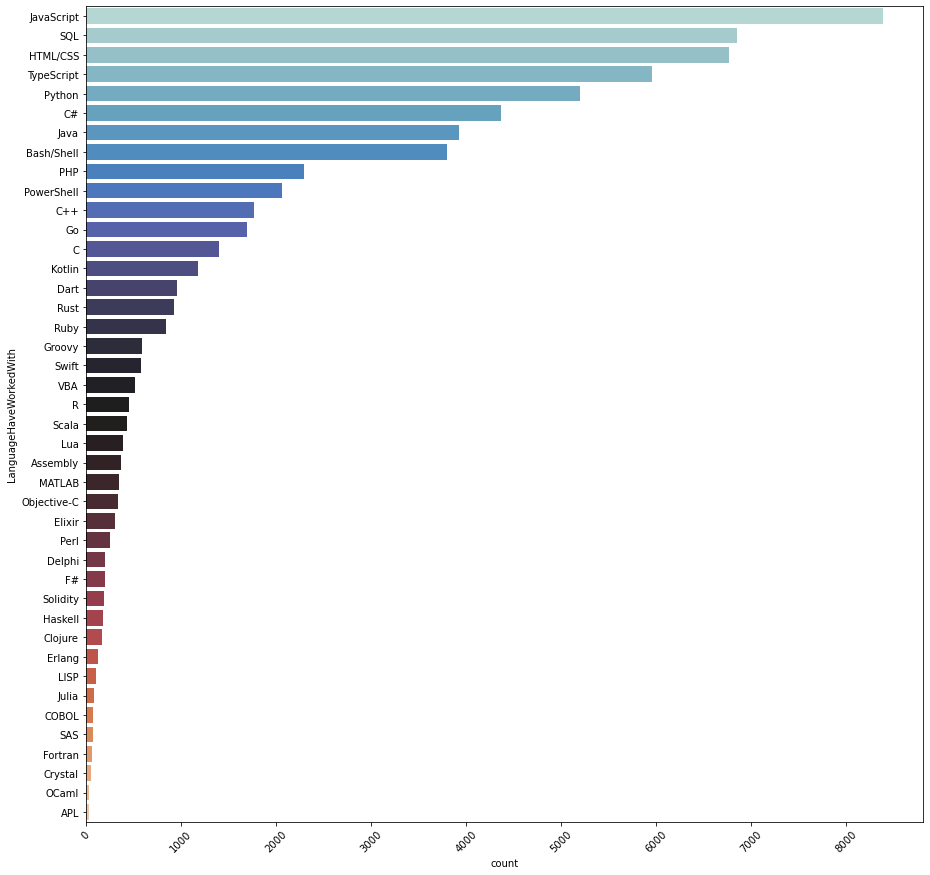

In [43]:
clean_data('LanguageHaveWorkedWith')

AWS                            6220
Microsoft Azure                4115
Google Cloud                   2998
Firebase                       2252
Heroku                         2008
DigitalOcean                   1895
VMware                          836
Managed Hosting                 692
OVH                             422
Linode                          390
OpenStack                       228
Oracle Cloud Infrastructure     184
IBM Cloud or Watson             176
Colocation                      150
dtype: int64


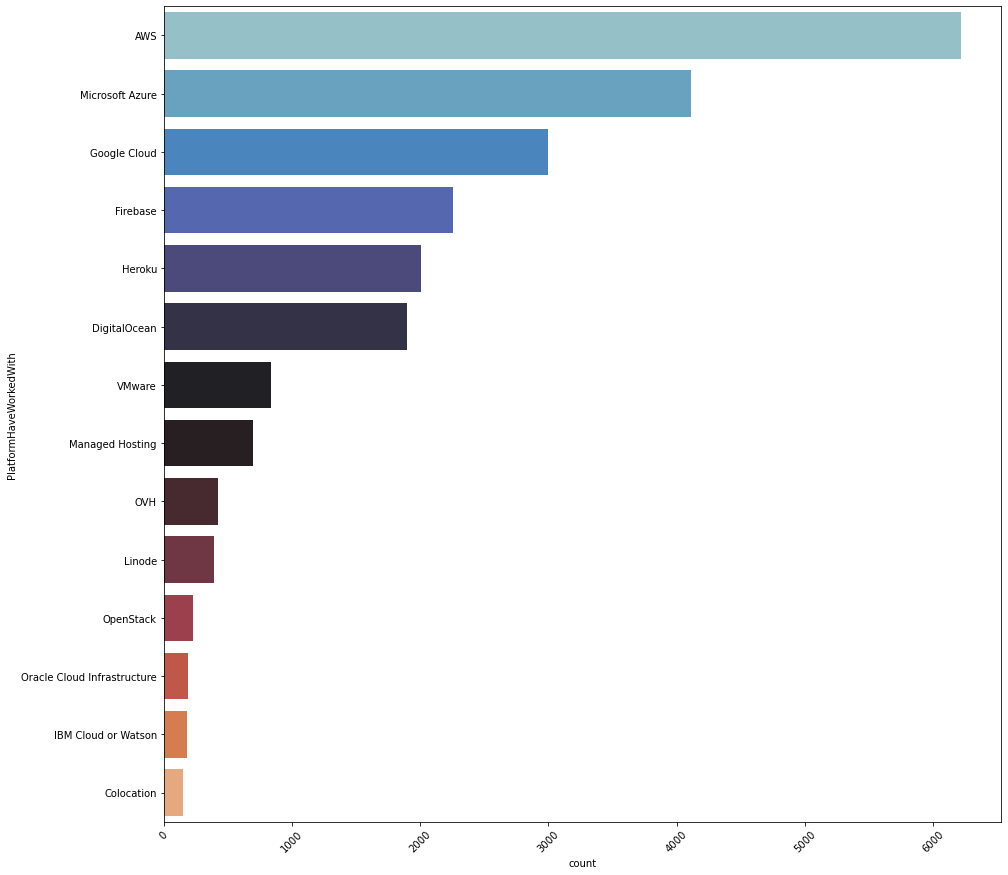

In [44]:
clean_data('PlatformHaveWorkedWith')

Node.js           5410
React.js          5137
ASP.NET Core      3180
Angular           3090
jQuery            3080
Express           2805
Vue.js            2275
ASP.NET           2225
Flask             1793
Django            1609
Next.js           1585
Angular.js        1283
Laravel            959
FastAPI            918
Blazor             692
Ruby on Rails      630
Gatsby             499
Svelte             488
Nuxt.js            439
Symfony            369
Fastify            255
Drupal             242
Phoenix            221
Deno               178
Play Framework     117
dtype: int64


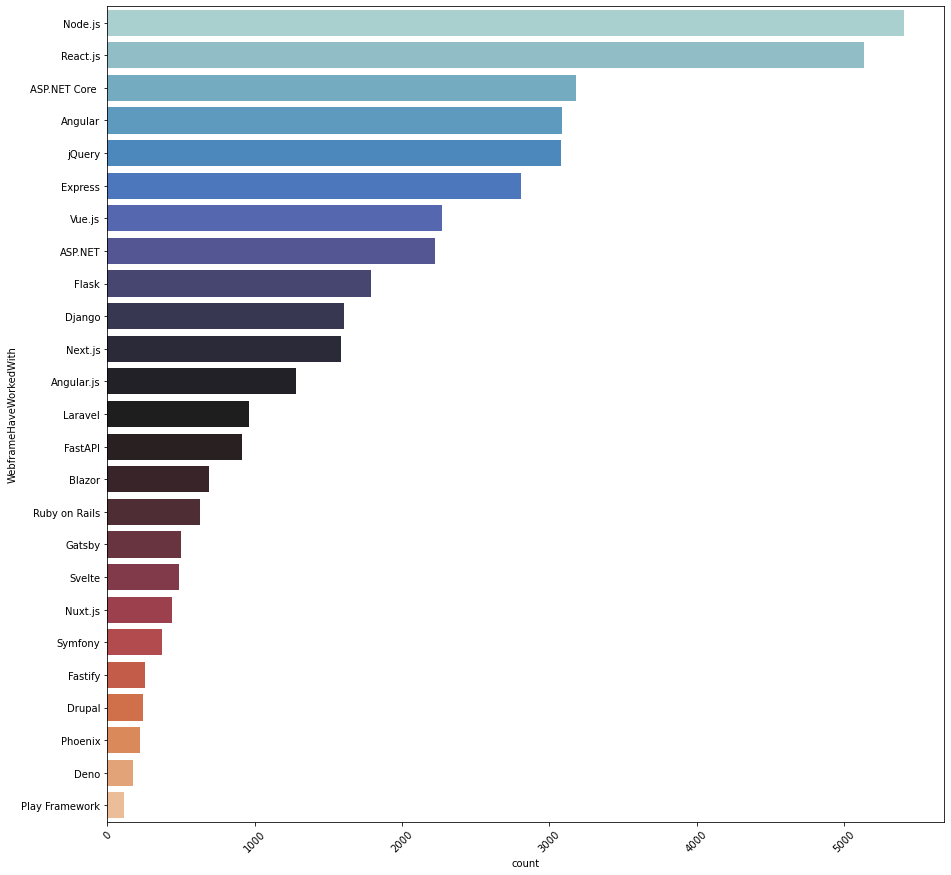

In [45]:
clean_data('WebframeHaveWorkedWith')

.NET                         4003
NumPy                        2365
Pandas                       2313
Spring                       2036
React Native                 1811
Apache Kafka                 1620
Flutter                      1322
Electron                     1269
TensorFlow                   1151
Scikit-learn                 1058
Ionic                         804
Torch/PyTorch                 698
Cordova                       645
Xamarin                       617
Apache Spark                  604
Keras                         595
Qt                            560
Hadoop                        376
Capacitor                     370
Hugging Face Transformers     203
GTK                           170
Tidyverse                     125
Uno Platform                   51
dtype: int64


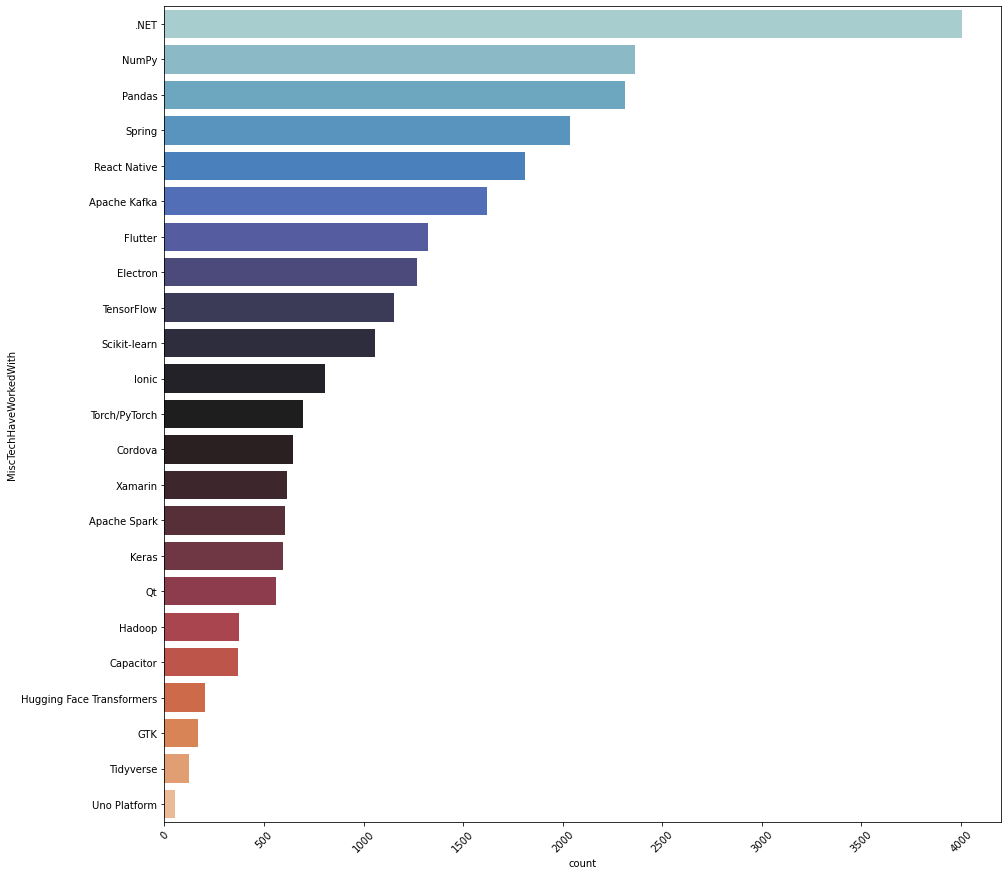

In [46]:
clean_data('MiscTechHaveWorkedWith')

Docker           7972
npm              7686
Yarn             3609
Kubernetes       3558
Homebrew         3281
Terraform        1836
Ansible          1222
Unity 3D          859
Unreal Engine     340
Puppet            242
Chef              212
Pulumi            147
Flow               86
dtype: int64


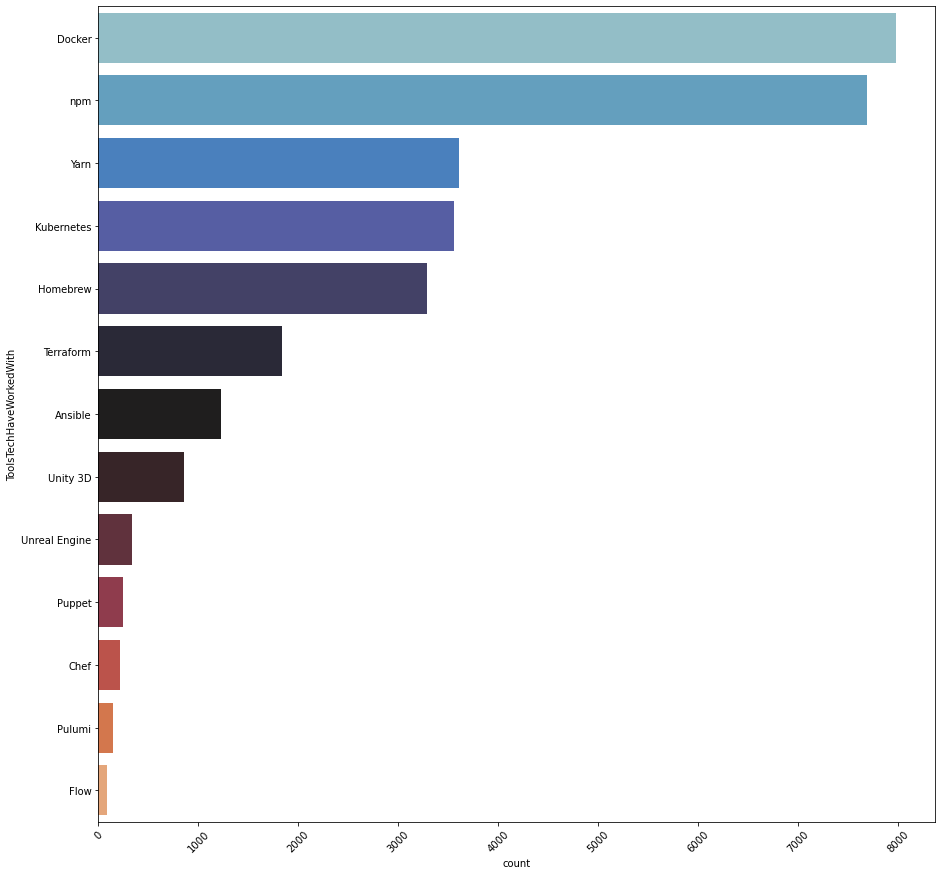

In [47]:
clean_data('ToolsTechHaveWorkedWith')

Visual Studio Code                  8749
Visual Studio                       4254
IntelliJ                            3637
Notepad++                           3305
Vim                                 2892
Android Studio                      2634
PyCharm                             1935
Sublime Text                        1928
Xcode                               1664
Eclipse                             1440
IPython/Jupyter                     1395
Webstorm                            1282
Nano                                1238
Rider                               1027
Atom                                1007
PhpStorm                             802
Neovim                               688
NetBeans                             614
GoLand                               553
CLion                                463
Emacs                                435
RStudio                              312
Qt Creator                           250
RubyMine                             224
Spyder          

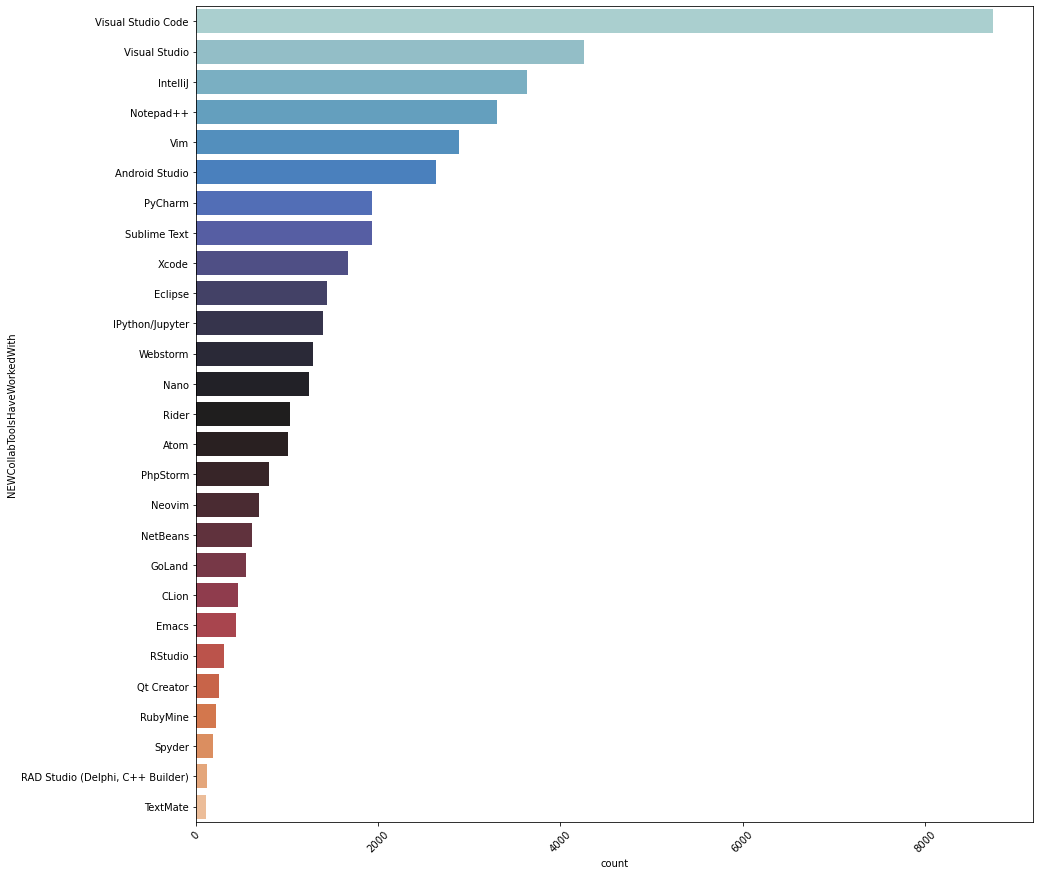

In [48]:
clean_data('NEWCollabToolsHaveWorkedWith')

Windows                              5519
macOS                                4638
Linux-based                          4401
Windows Subsystem for Linux (WSL)    2298
BSD                                    97
Other (please specify):                31
dtype: int64


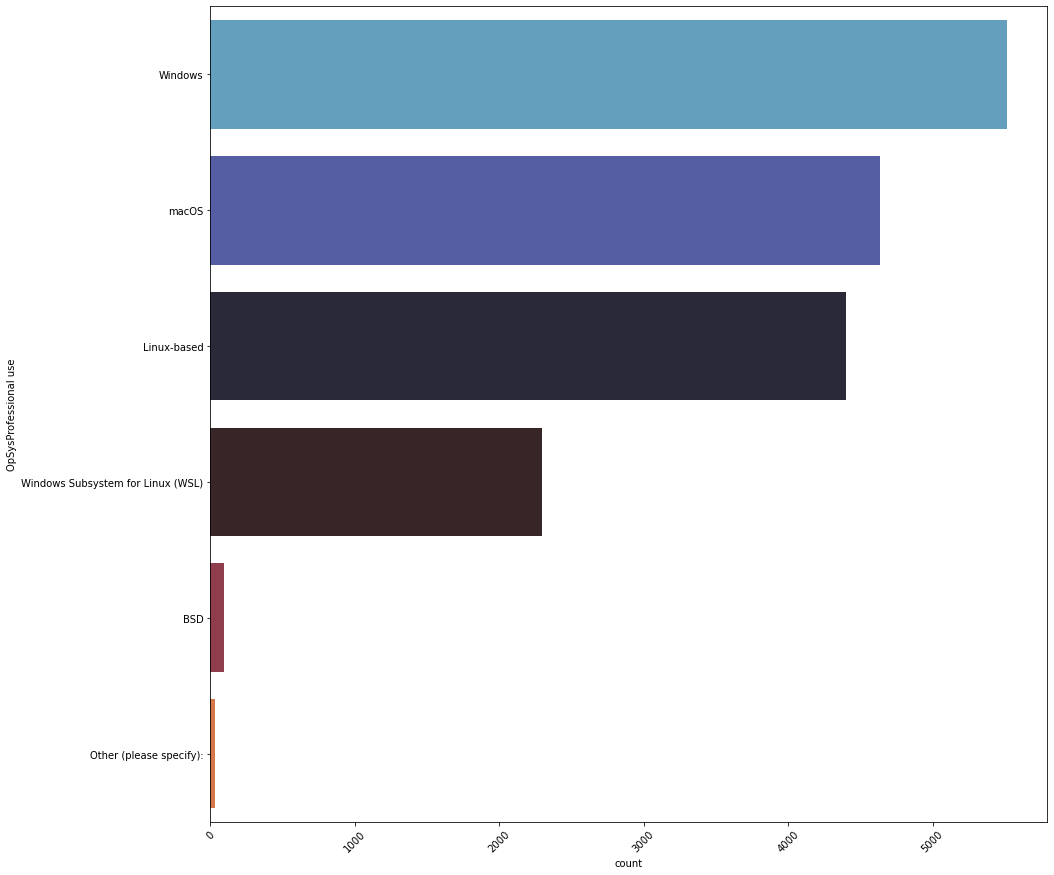

In [49]:
clean_data('OpSysProfessional use')

In [50]:
salary_df.columns

Index(['Employment', 'EdLevel', 'YearsCodePro', 'DevType', 'OrgSize',
       'Country', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'OpSysProfessional use', 'Age',
       'Gender', 'WorkExp', 'Salary'],
      dtype='object')

In [51]:
salary_df.Age.unique()

array(['35-44 years old', '25-34 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', 'Under 18 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [52]:
salary_df['Age'] = salary_df.Age.replace(['25-34 years old', '35-44 years old', '18-24 years old','55-64 years old', '45-54 years old', 'Under 18 years old','65 years or older', 'Prefer not to say'],['25-34','35-44','18-24','55-64','45-54','<18','>65',np.nan])
salary_df = salary_df.dropna()
salary_df.head()

,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary
ResponseId,,,,,,,,,,,,,,,,,,
12,"Employed, full-time;Independent contractor, fr...",Bachelors,10.0,Engineering manager,Micro enterprise,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Linux-based;macOS;Windows,35-44,Man,14.0,194400.0
13,"Employed, full-time",Bachelors,5.0,"Developer, full-stack",Micro enterprise,United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,Torch/PyTorch,Docker,Vim;Visual Studio,macOS,25-34,Man,5.0,65000.0
15,"Employed, full-time;Independent contractor, fr...",Masters,5.0,"Developer, full-stack;Academic researcher;DevO...",Large enterprise,United States of America,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Elasticsearch;MongoDB;Neo4j;PostgreSQL,AWS;DigitalOcean;Heroku,Django;Flask;jQuery;Node.js;Ruby on Rails;Vue.js,Apache Kafka;Apache Spark;NumPy;Pandas;Tidyverse,Docker;npm;Yarn,IPython/Jupyter;Nano;RStudio;Visual Studio Code,macOS,25-34,Man,5.0,110000.0
22,"Employed, full-time",Masters,4.0,"Developer, full-stack",Micro enterprise,Italy,Python;SQL;TypeScript,MySQL;Redis;SQLite,Google Cloud;OVH;VMware,Angular;FastAPI;Vue.js,NumPy;Pandas,Docker;Kubernetes,Neovim;Sublime Text;Visual Studio Code,Windows Subsystem for Linux (WSL),25-34,Man,4.0,34126.0
23,"Employed, full-time",Undergraduate,20.0,"Developer, back-end",Small enterprise,Canada,C#;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Google Cloud;Microsoft Azure,Angular;ASP.NET Core ;React.js,.NET,Docker;Kubernetes;npm;Terraform;Yarn,Rider;Visual Studio;Visual Studio Code,Windows,35-44,Man,23.0,97605.0


In [53]:
age_count = salary_df.Age.value_counts()
Age = pd.DataFrame(age_count)

In [54]:
from tabulate import tabulate
print(tabulate(Age, headers=['Age', 'Count']))

Age      Count
-----  -------
25-34     5584
35-44     2467
18-24     1405
45-54      720
55-64      166
>65         15
<18         13


<AxesSubplot:xlabel='count', ylabel='Age'>

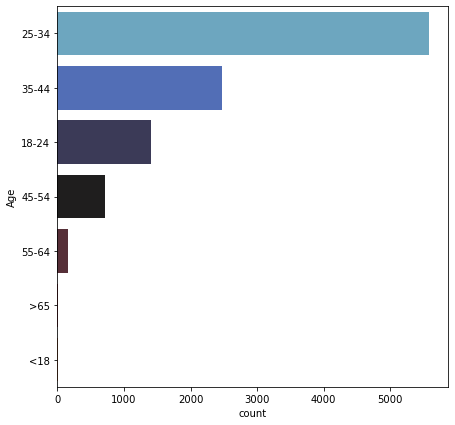

In [55]:
plt.figure(figsize =(7,7))
sns.countplot(y = salary_df.Age,order = salary_df['Age'].value_counts().index,palette = "icefire")

In [56]:
salary_df.Gender.unique()

array(['Man', 'Woman', 'Prefer not to say', 'Or, in your own words:',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman'], dtype=object)

In [57]:
salary_df.Gender = salary_df.Gender.replace(['Man', 'Woman', 'Prefer not to say',
                                             'Non-binary, genderqueer, or gender non-conforming',
                                             'Man;Non-binary, genderqueer, or gender non-conforming',
                                             'Woman;Non-binary, genderqueer, or gender non-conforming',
                                             'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming','Or, in your own words:', 'Man;Or, in your own words:','Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming','Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming','Man;Woman;Non-binary, genderqueer, or gender non-conforming','Or, in your own words:;Non-binary, genderqueer, or gender non-conforming','Man;Woman'],
                                            ['Man','Woman','Others','Others','Man','Woman','Others','Others','Others','Others','Others','Others','Others','Others'])
salary_df.Gender.unique()

array(['Man', 'Woman', 'Others'], dtype=object)

In [58]:
gender_count = salary_df.Gender.value_counts()
gender_count

Man       9778
Woman      380
Others     212
Name: Gender, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Gender'>

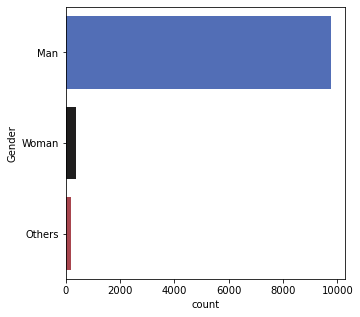

In [59]:
plt.figure(figsize =(5,5))
sns.countplot(y = salary_df.Gender,order = salary_df['Gender'].value_counts().index,palette = "icefire")

In [60]:
salary_df.WorkExp.unique()

array([14.,  5.,  4., 23.,  9., 22.,  6.,  3., 12.,  7.,  8., 15., 27.,
       19., 10.,  2.,  1., 17., 25., 11., 20.,  0., 28., 16., 31., 30.,
       13., 21., 18., 26., 24., 29., 32., 33., 35., 41., 44., 34., 40.,
       45., 50., 38., 36., 42., 46., 37., 39., 43., 49.])

In [61]:
work_count = salary_df.WorkExp.value_counts()
work_count

5.0     916
3.0     810
4.0     778
10.0    745
6.0     646
2.0     628
8.0     591
7.0     582
1.0     516
12.0    436
15.0    433
11.0    338
20.0    330
9.0     327
25.0    232
14.0    230
13.0    220
16.0    206
22.0    175
18.0    174
17.0    174
23.0    103
24.0     90
30.0     88
21.0     67
19.0     63
26.0     63
0.0      49
27.0     49
28.0     45
35.0     33
32.0     30
29.0     27
40.0     27
31.0     21
36.0     18
37.0     17
34.0     15
33.0     14
38.0     14
42.0      9
45.0      8
50.0      8
41.0      6
44.0      6
39.0      5
46.0      3
43.0      3
49.0      2
Name: WorkExp, dtype: int64

In [62]:
def workexp_group(x):
    bucket = 0
    if x < 1:
        bucket = 'Less than 1 year'
    
    # Age 30 to 39 ('range' excludes upper bound)
    if x in range(0, 4):
        bucket = '1-4'
        
    if x in range(5, 10):
        bucket = '5-9'
        
    if x in range(10, 15):
        bucket = '10-14'
    
    if x in range(15, 20):
        bucket = '15-19'
    
    if x in range(20, 25):
        bucket = '20-24'
    
    if x in range(25, 30):
        bucket = '25-29'
        
    if x in range(30, 35):
        bucket = '30-34'

    if x in range(35, 40):
        bucket = '35-39'
    
    if x in range(40, 45):
        bucket = '40-44'
        
    if x in range(45, 50):
        bucket = '45-49'
        
    if x > 50:
        bucket = 'More than 50 years'
        
    return bucket

salary_df['YearsCodePro_Group'] = salary_df['YearsCodePro'].apply(workexp_group)
salary_df.head()


,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary,YearsCodePro_Group
ResponseId,,,,,,,,,,,,,,,,,,,
12,"Employed, full-time;Independent contractor, fr...",Bachelors,10.0,Engineering manager,Micro enterprise,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Linux-based;macOS;Windows,35-44,Man,14.0,194400.0,10-14
13,"Employed, full-time",Bachelors,5.0,"Developer, full-stack",Micro enterprise,United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,Torch/PyTorch,Docker,Vim;Visual Studio,macOS,25-34,Man,5.0,65000.0,5-9
15,"Employed, full-time;Independent contractor, fr...",Masters,5.0,"Developer, full-stack;Academic researcher;DevO...",Large enterprise,United States of America,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Elasticsearch;MongoDB;Neo4j;PostgreSQL,AWS;DigitalOcean;Heroku,Django;Flask;jQuery;Node.js;Ruby on Rails;Vue.js,Apache Kafka;Apache Spark;NumPy;Pandas;Tidyverse,Docker;npm;Yarn,IPython/Jupyter;Nano;RStudio;Visual Studio Code,macOS,25-34,Man,5.0,110000.0,5-9
22,"Employed, full-time",Masters,4.0,"Developer, full-stack",Micro enterprise,Italy,Python;SQL;TypeScript,MySQL;Redis;SQLite,Google Cloud;OVH;VMware,Angular;FastAPI;Vue.js,NumPy;Pandas,Docker;Kubernetes,Neovim;Sublime Text;Visual Studio Code,Windows Subsystem for Linux (WSL),25-34,Man,4.0,34126.0,0
23,"Employed, full-time",Undergraduate,20.0,"Developer, back-end",Small enterprise,Canada,C#;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Google Cloud;Microsoft Azure,Angular;ASP.NET Core ;React.js,.NET,Docker;Kubernetes;npm;Terraform;Yarn,Rider;Visual Studio;Visual Studio Code,Windows,35-44,Man,23.0,97605.0,20-24


<AxesSubplot:xlabel='count', ylabel='YearsCodePro_Group'>

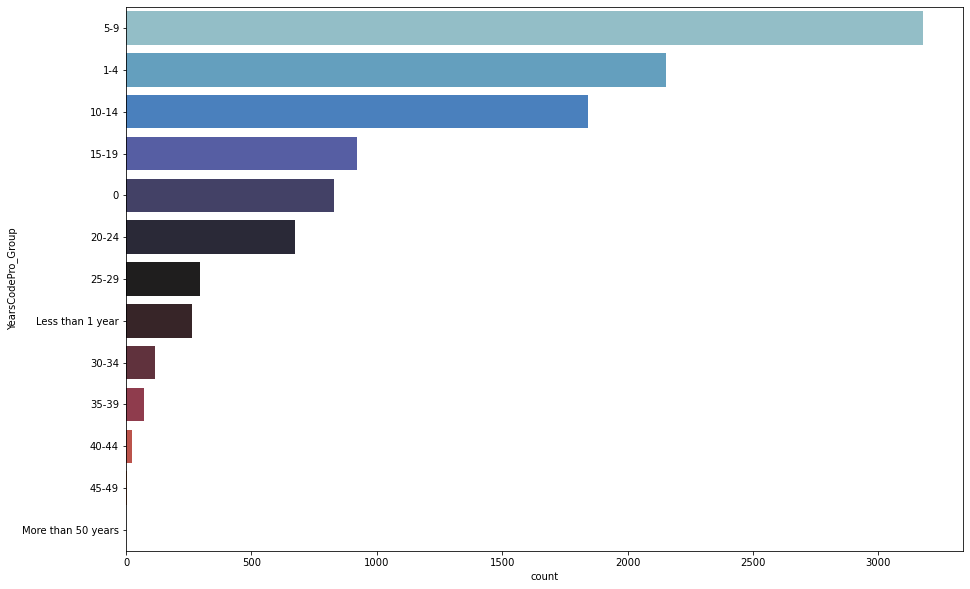

In [63]:
plt.figure(figsize =(15,10))
sns.countplot(y = salary_df.YearsCodePro_Group,order = salary_df['YearsCodePro_Group'].value_counts().index,palette = "icefire")

In [64]:
salary_df['WorkExp_Group'] = salary_df['WorkExp'].apply(workexp_group)
salary_df.head()

,Employment,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OpSysProfessional use,Age,Gender,WorkExp,Salary,YearsCodePro_Group,WorkExp_Group
ResponseId,,,,,,,,,,,,,,,,,,,,
12,"Employed, full-time;Independent contractor, fr...",Bachelors,10.0,Engineering manager,Micro enterprise,United States of America,C#;HTML/CSS;JavaScript;PowerShell;Python;Rust;SQL,Couchbase;CouchDB;Microsoft SQL Server;MongoDB...,AWS;Microsoft Azure,ASP.NET;ASP.NET Core ;Express;Node.js;Vue.js,.NET;Keras;NumPy;Pandas;Scikit-learn;TensorFlo...,Docker;Homebrew;Kubernetes,IPython/Jupyter;Neovim;Visual Studio;Visual St...,Linux-based;macOS;Windows,35-44,Man,14.0,194400.0,10-14,10-14
13,"Employed, full-time",Bachelors,5.0,"Developer, full-stack",Micro enterprise,United States of America,C;HTML/CSS;Rust;SQL;Swift;TypeScript,PostgreSQL,AWS,React.js,Torch/PyTorch,Docker,Vim;Visual Studio,macOS,25-34,Man,5.0,65000.0,5-9,5-9
15,"Employed, full-time;Independent contractor, fr...",Masters,5.0,"Developer, full-stack;Academic researcher;DevO...",Large enterprise,United States of America,HTML/CSS;JavaScript;PHP;Python;R;Ruby;Scala,Elasticsearch;MongoDB;Neo4j;PostgreSQL,AWS;DigitalOcean;Heroku,Django;Flask;jQuery;Node.js;Ruby on Rails;Vue.js,Apache Kafka;Apache Spark;NumPy;Pandas;Tidyverse,Docker;npm;Yarn,IPython/Jupyter;Nano;RStudio;Visual Studio Code,macOS,25-34,Man,5.0,110000.0,5-9,5-9
22,"Employed, full-time",Masters,4.0,"Developer, full-stack",Micro enterprise,Italy,Python;SQL;TypeScript,MySQL;Redis;SQLite,Google Cloud;OVH;VMware,Angular;FastAPI;Vue.js,NumPy;Pandas,Docker;Kubernetes,Neovim;Sublime Text;Visual Studio Code,Windows Subsystem for Linux (WSL),25-34,Man,4.0,34126.0,0,0
23,"Employed, full-time",Undergraduate,20.0,"Developer, back-end",Small enterprise,Canada,C#;SQL;TypeScript,Microsoft SQL Server;PostgreSQL;Redis,Google Cloud;Microsoft Azure,Angular;ASP.NET Core ;React.js,.NET,Docker;Kubernetes;npm;Terraform;Yarn,Rider;Visual Studio;Visual Studio Code,Windows,35-44,Man,23.0,97605.0,20-24,20-24


In [65]:
salary_df.WorkExp_Group.value_counts()

5-9      3062
1-4      2003
10-14    1969
15-19    1050
0         786
20-24     765
25-29     416
30-34     168
35-39      87
40-44      51
45-49      13
Name: WorkExp_Group, dtype: int64

<AxesSubplot:xlabel='count', ylabel='WorkExp_Group'>

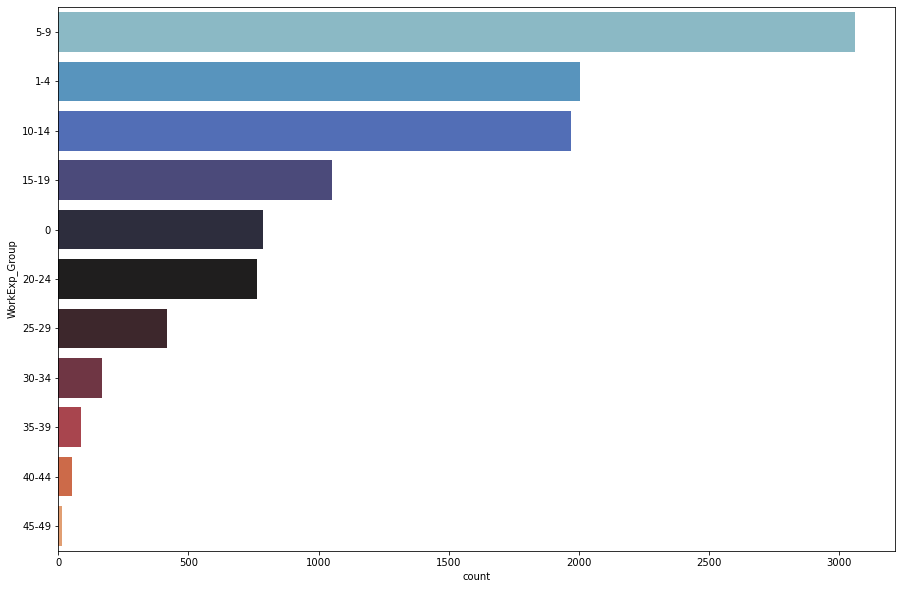

In [66]:
plt.figure(figsize =(15,10))
sns.countplot(y = salary_df.WorkExp_Group,order = salary_df['WorkExp_Group'].value_counts().index,palette = "icefire")

In [67]:
salary_df[['WorkExp','WorkExp_Group']]

,WorkExp,WorkExp_Group
ResponseId,,
12,14.0,10-14
13,5.0,5-9
15,5.0,5-9
22,4.0,0
23,23.0,20-24
...,...,...
73102,14.0,10-14
73103,5.0,5-9
73113,3.0,1-4


In [68]:
salary_df = salary_df[['Employment','EdLevel','YearsCodePro','WorkExp','Age','Gender','OrgSize','Country','Salary']]

In [71]:
salary_df = salary_df.loc[salary_df['Employment'] == 'Employed, full-time']

In [72]:
salary_df.head()

,Employment,EdLevel,YearsCodePro,WorkExp,Age,Gender,OrgSize,Country,Salary
ResponseId,,,,,,,,,
13,"Employed, full-time",Bachelors,5.0,5.0,25-34,Man,Micro enterprise,United States of America,65000.0
22,"Employed, full-time",Masters,4.0,4.0,25-34,Man,Micro enterprise,Italy,34126.0
23,"Employed, full-time",Undergraduate,20.0,23.0,35-44,Man,Small enterprise,Canada,97605.0
26,"Employed, full-time",Masters,9.0,9.0,25-34,Man,Micro enterprise,Germany,90647.0
52,"Employed, full-time",Bachelors,3.0,3.0,25-34,Man,Micro enterprise,Poland,38856.0


## Identifying Outliers

<AxesSubplot:xlabel='YearsCodePro', ylabel='EdLevel'>

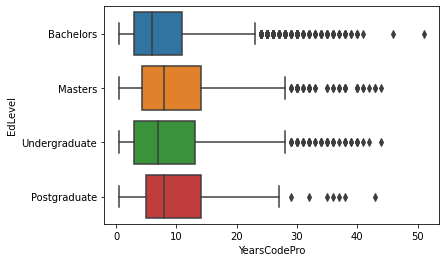

In [74]:
sns.boxplot(x = salary_df['YearsCodePro'], y = salary_df['EdLevel'])

<AxesSubplot:xlabel='WorkExp', ylabel='OrgSize'>

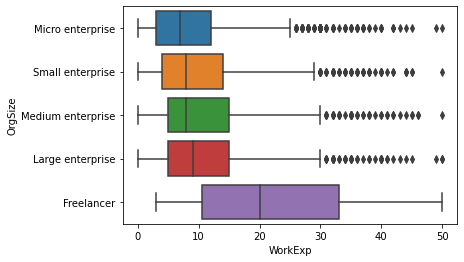

In [75]:
sns.boxplot(x = salary_df['WorkExp'], y = salary_df['OrgSize'])

<AxesSubplot:xlabel='Salary', ylabel='EdLevel'>

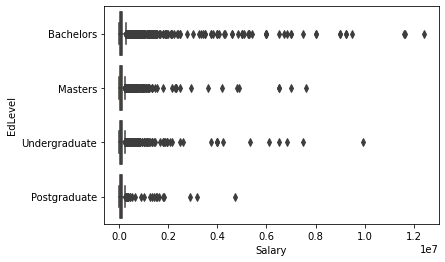

In [76]:
sns.boxplot(x = salary_df['Salary'], y = salary_df['EdLevel'])

<AxesSubplot:xlabel='Salary', ylabel='OrgSize'>

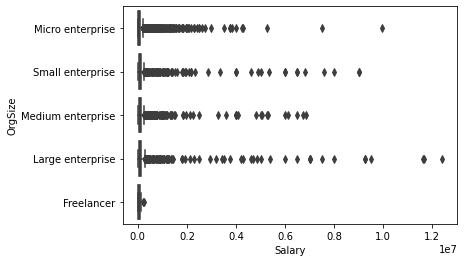

In [77]:
sns.boxplot(x = salary_df['Salary'], y = salary_df['OrgSize'])

In [ ]:
def outliers(data):
    for i in salary_df['WorkExp']:
        q1 = salary_df['WorkExp'].quantile(0.25)
        q3 = salary_df['WorkExp'].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        up_lim  = q3 + 1.5*iqr
        if i> up_lim or i< low_lim:
            salary_df['WorkExp'] = salary_df['WorkExp'].replace(i,np.mean(salary_df['WorkExp']))
    sns.boxplot(salary_df['WorkExp'])

25th and 75th quartile: 4.0 14.0
inter-quartile range: 10.0
boundaries: -11.0 29.0
Identified outliers: 254
Non-outlier observations: 8344


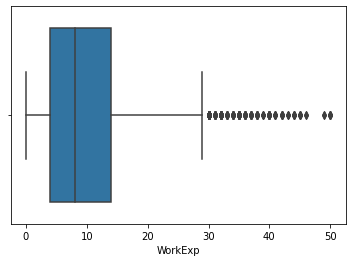

In [110]:
outliers(salary_df['WorkExp'])

25th and 75th quartile: 4.0 12.0
inter-quartile range: 8.0
boundaries: -8.0 24.0
Identified outliers: 402
Non-outlier observations: 8196


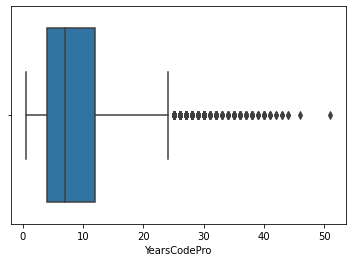

In [111]:
outliers(salary_df['YearsCodePro'])

25th and 75th quartile: 35424.0 123788.75
inter-quartile range: 88364.75
boundaries: -97123.125 256335.875
Identified outliers: 560
Non-outlier observations: 8038


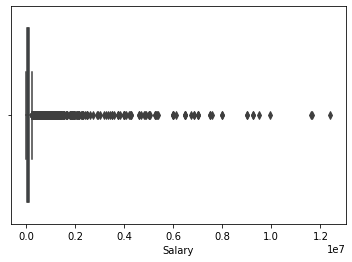

In [112]:
outliers(salary_df['Salary'])

In [113]:
salary_df.to_csv('clean_data.csv')